## 0. Packages and Datasets Import

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")


In [19]:
# Load data
df = pd.read_csv('../Data/digital_marketing_campaign_dataset.csv')
df.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


## 1. EDA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [21]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [22]:
num_rows, num_cols = df.shape
print('df has {} rows and {} columns'.format(num_rows, num_cols))

df has 8000 rows and 20 columns


In [23]:
def print_column_info(df):
    col_info = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Unique Values': [df[col].nunique() for col in df.columns]
    })
    print(col_info)

print_column_info(df)

            Column Name Data Type  Unique Values
0            CustomerID     int64           8000
1                   Age     int64             52
2                Gender    object              2
3                Income     int64           7789
4       CampaignChannel    object              5
5          CampaignType    object              4
6               AdSpend   float64           8000
7      ClickThroughRate   float64           8000
8        ConversionRate   float64           8000
9         WebsiteVisits     int64             50
10        PagesPerVisit   float64           8000
11           TimeOnSite   float64           8000
12         SocialShares     int64            100
13           EmailOpens     int64             20
14          EmailClicks     int64             10
15    PreviousPurchases     int64             10
16        LoyaltyPoints     int64           3983
17  AdvertisingPlatform    object              1
18      AdvertisingTool    object              1
19           Convers

## 2. Data Cleaning

### 2.1 Removing Columns that does not contribute to segmentation
Columns `AdvertisingPlatform`, `AdvertisingTool` only have one unique value for all rows and `CustomerID` also does not contribute to segmentation, so I dropped these columns.

In [24]:
# Drop columns with single unique values or identifiers
df_drop = df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool', 'CustomerID'])

### 2.2 Check for missing values

In [25]:
df.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

## 3. Model Training and Evaluation
In this section, I aim to **model the relationship between customer engagement and conversion**.  
I will first use engagement metrics to predict whether a customer will convert (Model 1), then derive a weighted **Engagement Score** based on model importance, and finally model what drives that Engagement Score using customer and campaign features (Model 2).

### 3.1 Model 1: Predicting Conversion from Engagement Metrics
I use 6 engagement-related features to predict whether a customer will convert.

**Features (X):**
- WebsiteVisits
- PagesPerVisit
- TimeOnSite
- SocialShares
- EmailOpens
- EmailClicks

**Target (y):** Conversion (1 if customer converted, 0 otherwise)

I'll train a `RandomForestClassifier` and extract feature importances to understand which engagement variables matter most.

In [26]:
# Define features and target variable
engagement_columns = [ "WebsiteVisits", "PagesPerVisit", "TimeOnSite", "SocialShares", "EmailOpens", "EmailClicks" ]

# Features: engagement variables; Target: conversion
X = df_drop[engagement_columns]
y = df_drop["Conversion"]

# Standardize engagement features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate conversion model
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]
print("=== Predicting Conversion from Engagement ===")
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

=== Predicting Conversion from Engagement ===
ROC-AUC: 0.6780385241454152
Confusion Matrix:
 [[  23  171]
 [  35 1371]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.12      0.18       194
           1       0.89      0.98      0.93      1406

    accuracy                           0.87      1600
   macro avg       0.64      0.55      0.56      1600
weighted avg       0.83      0.87      0.84      1600



{'PagesPerVisit': np.float64(0.22234600270247495), 'TimeOnSite': np.float64(0.21863140928368058), 'SocialShares': np.float64(0.16185729680437677), 'WebsiteVisits': np.float64(0.1599201399408388), 'EmailOpens': np.float64(0.13142737417211625), 'EmailClicks': np.float64(0.1058177770965127)}

Raw Feature Importances (importance_dict):
PagesPerVisit: 0.2223
TimeOnSite: 0.2186
SocialShares: 0.1619
WebsiteVisits: 0.1599
EmailOpens: 0.1314
EmailClicks: 0.1058


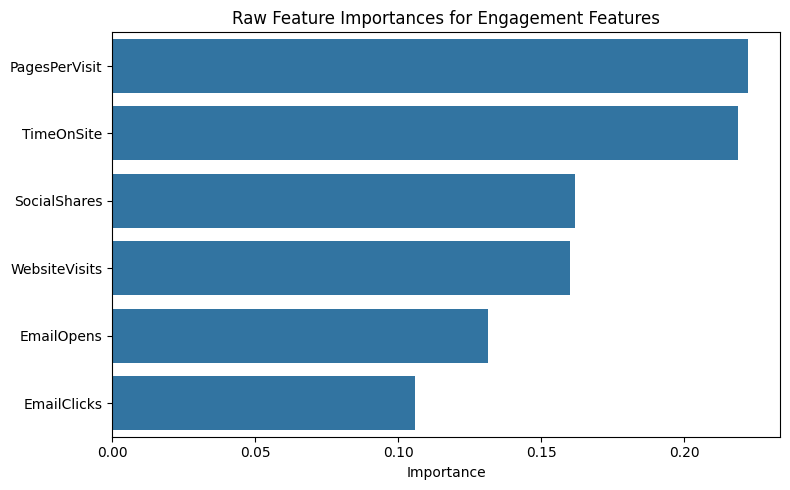

In [27]:
# Derive and Visualize Feature Importances
importance_dict = dict(zip(engagement_columns, rf.feature_importances_))
importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
print(importance_dict)

# Print importance values
print("\nRaw Feature Importances (importance_dict):")
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=list(importance_dict.values()), y=list(importance_dict.keys()))
plt.title("Raw Feature Importances for Engagement Features")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

This bar plot visualizes how much each engagement feature contributes to predicting conversion. 

In [28]:
# Normalize the importances for scoring
weights = {key: value / sum(importance_dict.values()) for key, value in importance_dict.items()}
print(weights)

{'PagesPerVisit': np.float64(0.22234600270247495), 'TimeOnSite': np.float64(0.21863140928368058), 'SocialShares': np.float64(0.16185729680437677), 'WebsiteVisits': np.float64(0.1599201399408388), 'EmailOpens': np.float64(0.13142737417211625), 'EmailClicks': np.float64(0.1058177770965127)}


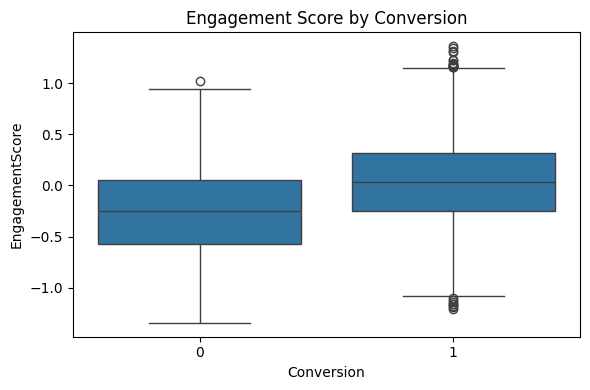

In [29]:
# Compute Weighted Engagement Score
# Re-standardize engagement columns in df_drop
df_drop[engagement_columns] = scaler.fit_transform(df_drop[engagement_columns])
df_drop["EngagementScore"] = sum(df_drop[col] * weights[col] for col in engagement_columns)

# Visualize score by conversion
plt.figure(figsize=(6, 4))
sns.boxplot(x='Conversion', y='EngagementScore', data=df_drop)
plt.title("Engagement Score by Conversion")
plt.tight_layout()
plt.show()

This boxplot shows the distribution of Engagement Score for customers who converted (1) vs those who didn’t (0). Median Engagement Score is significantly higher for converters. Customers who converted tend to have consistently higher engagement scores, with fewer low-scoring outliers.

### 3.2 Model 2: Predicting EngagementScore from Customer and Campaign Features
I now treat `EngagementScore` as the target variable, and aim to predict it from **non-engagement features** such as:
- Age, Gender, Income
- CampaignChannel, CampaignType
- AdSpend, ClickThroughRate
- PreviousPurchases, LoyaltyPoints

This helps us answer the question:
> What customer or campaign characteristics are most strongly correlated with engagement?

I'll use two models:
1. Random Forest Regressor
2. Gradient Boosting Regressor


In [30]:
engagement_columns = [
    "WebsiteVisits", "PagesPerVisit", "TimeOnSite",
    "SocialShares", "EmailOpens", "EmailClicks"
]

non_engagement_features = [
    col for col in df_drop.columns
    if col not in engagement_columns + ['CustomerID', 'ConversionRate', 'Conversion', 'AdvertisingPlatform', 'AdvertisingTool', 'EngagementScore']
]
print(non_engagement_features)

X = df_drop[non_engagement_features].copy()
y = df_drop["EngagementScore"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Categorical / numeric split
categorical_cols = ['Gender', 'CampaignChannel', 'CampaignType']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])

['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'PreviousPurchases', 'LoyaltyPoints']


### 3.2.1 Random Forest Regressor

Random Forest MSE: 0.1888


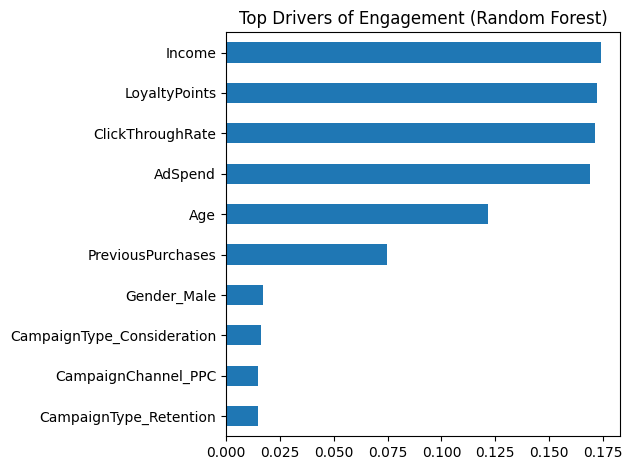


Top Feature Importances (Random Forest):
Income: 0.1742
LoyaltyPoints: 0.1724
ClickThroughRate: 0.1712
AdSpend: 0.1691
Age: 0.1216
PreviousPurchases: 0.0748
Gender_Male: 0.0170
CampaignType_Consideration: 0.0162
CampaignChannel_PPC: 0.0149
CampaignType_Retention: 0.0147


In [31]:
pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")

# Plot RF feature importances
rf_model = pipe_rf.named_steps["model"]
rf_features = numerical_cols + list(pipe_rf.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_cols))
rf_importances = pd.Series(rf_model.feature_importances_, index=rf_features)
rf_importances.sort_values().tail(10).plot(kind='barh', title='Top Drivers of Engagement (Random Forest)')
plt.tight_layout()
plt.show()

# Print top 10 RF importances
print("\nTop Feature Importances (Random Forest):")
sorted_rf = rf_importances.sort_values(ascending=False)
for feature, importance in sorted_rf.head(10).items():
    print(f"{feature}: {importance:.4f}")

The most engaged users tend to be higher-income, brand-loyal, and click-responsive.

Historical and behavioral indicators like AdSpend and PreviousPurchases also help predict engagement.

These insights enable targeted personalization — especially in campaign design and budget allocation.

### 3.2.2 Gradient Boosting Regressor

Gradient Boosting MSE: 0.1853


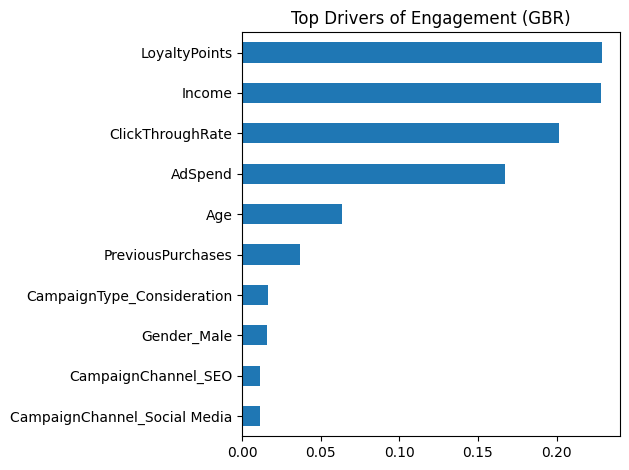


Top Feature Importances (Gradient Boosting):
LoyaltyPoints: 0.2289
Income: 0.2284
ClickThroughRate: 0.2014
AdSpend: 0.1672
Age: 0.0633
PreviousPurchases: 0.0368
CampaignType_Consideration: 0.0167
Gender_Male: 0.0159
CampaignChannel_SEO: 0.0116
CampaignChannel_Social Media: 0.0116


In [32]:
pipe_gb = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(n_estimators=100, random_state=42))
])
pipe_gb.fit(X_train, y_train)
y_pred_gb = pipe_gb.predict(X_test)
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gb):.4f}")

gb_model = pipe_gb.named_steps["model"]
gb_importances = pd.Series(gb_model.feature_importances_, index=rf_features)
gb_importances.sort_values().tail(10).plot(kind='barh', title='Top Drivers of Engagement (GBR)')
plt.tight_layout()
plt.show()

# Print top 10 GBR importances
print("\nTop Feature Importances (Gradient Boosting):")
sorted_gb = gb_importances.sort_values(ascending=False)
for feature, importance in sorted_gb.head(10).items():
    print(f"{feature}: {importance:.4f}")

Gradient Boosting confirms earlier findings: engaged users are loyal, well-targeted, and financially capable. Campaign strategies should emphasize value delivery to high-income and high-loyalty customers, and optimize creative content for high CTR.